## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
raw_data_path=os.path.join(os.pardir,"data","raw")
train_file_path=os.path.join(raw_data_path, "train.csv")
test_file_path=os.path.join(raw_data_path, "test.csv")

In [4]:
train_df=pd.read_csv(train_file_path, index_col="PassengerId")
test_df=pd.read_csv(test_file_path, index_col="PassengerId")

In [5]:
type(train_df)

pandas.core.frame.DataFrame

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [8]:
test_df["Survived"]=-999

In [9]:
df=pd.concat([train_df, test_df], axis=0)

In [10]:
df1=df.loc[((df.Sex=="male") & (df.Survived==1)),:]

print(len(df1))


109


#### Summary Statistics

##### Centrality Measures (mean and median)

In [11]:
df["Fare"].median() 

14.4542

In [12]:
df["Fare"].mean()

33.29547928134557

#### Spread Measure

##### Range (Max-Min)

79.83
7.8958
std dev {0} 51.75866823917411


<AxesSubplot:title={'center':'Passenge Fare Box Wiser Chart'}>

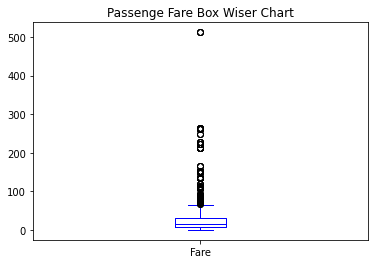

In [13]:
print(df["Age"].max()-df["Age"].min())
print(df.Fare.quantile(.25))
print("std dev {0}", df["Fare"].std())
df.Fare.plot(kind="box", title="Passenge Fare Box Wiser Chart", color="b")

##### percentile varieance and std deviation

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-318.747135,2.294882,29.881138,0.498854,0.385027,33.295479
std,466.107167,0.837836,14.413493,1.041658,0.865560,51.758668
min,-999.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-999.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


##### Categorical Measures

In [15]:
df[df.Survived!=-999].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Class Wise Passenger Count'}>

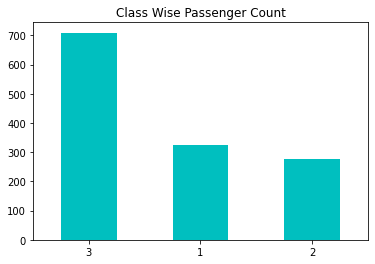

In [16]:
df.Pclass.value_counts().plot(kind="bar", rot=0, title="Class Wise Passenger Count", color="c")

<AxesSubplot:ylabel='Density'>

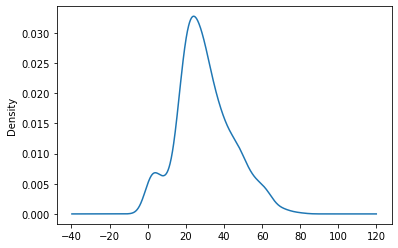

In [17]:


df.Age.plot(kind="kde")

28.0

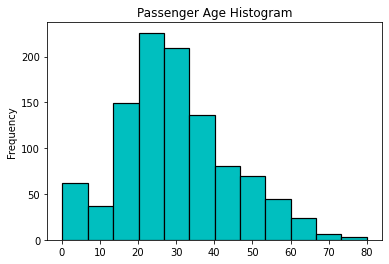

In [18]:
df.Age.plot(kind="hist", color="c", title="Passenger Age Histogram", bins=12, edgecolor='black', linewidth=1.2)
df.Age.median()

<AxesSubplot:title={'center':'Passenger Fare Histogram'}, ylabel='Frequency'>

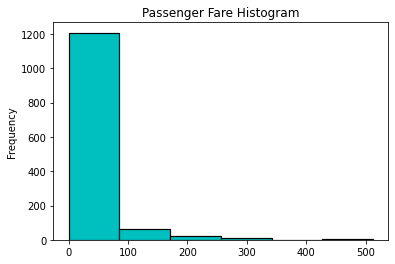

In [19]:
df.Fare.plot(kind="hist", color="c", title="Passenger Fare Histogram", bins=6, edgecolor='black', linewidth=1.2)

In [20]:
df.Age.skew()


0.40767455974362266

In [21]:
df.Fare.skew()


4.367709134122922

##### Corelation b/w passenger Age and Fare

<AxesSubplot:title={'center':'Passenger Age: Passenger Fare'}, xlabel='Age', ylabel='Fare'>

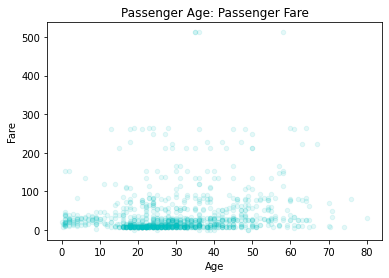

In [22]:
df.plot.scatter(x="Age", y="Fare", color="c", title="Passenger Age: Passenger Fare", alpha=0.1)

##### Corelation b/w Passenger Fare and Class

<AxesSubplot:title={'center':'Passenger Class: Passenger Fare'}, xlabel='Pclass', ylabel='Fare'>

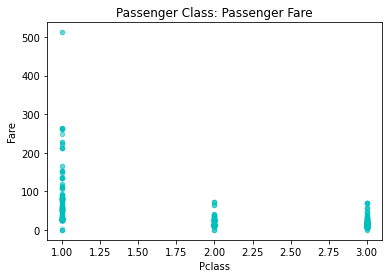

In [23]:
df.plot.scatter(x="Pclass", y="Fare", color="c", title="Passenger Class: Passenger Fare", alpha=0.2)


##### Dataframe Grouping

In [24]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [25]:
df.loc[df.Sex == "male","Age"].mean()


30.58522796352584

##### Crosstab

<AxesSubplot:xlabel='Sex'>

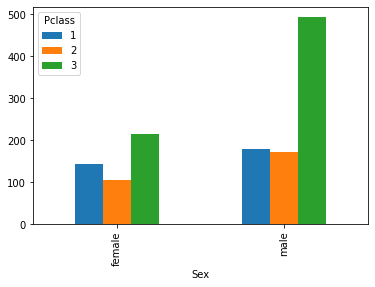

In [26]:
pd.crosstab(df.Sex, df.Pclass).plot(kind="bar")

In [27]:
def custom_crossTab(sex, pclass):
    return len(df.loc[((df.Sex==sex) & (df.Pclass==pclass))])


## Data Munging and Feature Engineering (Titanic Dataset)

##### Data Munging - Missing Values


##### Missing Values Imputaion (Mean/Median/Mode)

In [28]:
df.loc[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [29]:
df.groupby(["Embarked", "Pclass"]).Fare.median()

Embarked  Pclass
C         1         76.7292
          2         15.3146
          3          7.8958
Q         1         90.0000
          2         12.3500
          3          7.7500
S         1         52.0000
          2         15.3750
          3          8.0500
Name: Fare, dtype: float64

In [30]:
df.Embarked.fillna("C", inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


##### Data Munging | Missing Values Fare Column

In [32]:
df.loc[df.Fare.isnull(), :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-999,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [33]:
median_fare_value=df.loc[(df.Pclass==3)&(df.Embarked=="S")].Fare.median()


###### getting the estimated Fare value based on passengers class and Embarked columns and using its median

In [34]:
df.Fare.fillna(median_fare_value,inplace=True)

In [35]:
df.loc[df.Fare.isnull(), :]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


##### Data Munging | Missing Values Age Column

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [37]:
df[( (df.Name.str.contains("Master")))].Survived.value_counts()

 1      23
-999    21
 0      17
Name: Survived, dtype: int64

##### Get the title of the passengers based on thier names

In [38]:
title_dict={
    "mr":"Mr",
    "mrs":"Mrs",
    "miss":"Miss",
    "master":"Master",
    "don":"Sir",
    "rev":"Sir",
    "dr":"Officer",
    "mme":"Mrs",
    "ms":"Mrs",
    "major":"Officer",
    "lady":"Lady",
    "sir":"Sir",
    "mlle":"Ms",
    "col":"Officer",
    "capt":"Officer",
    "the countess":"Lady",
    "the jonkheer":"Sir",
    "jonkheer":"Sir",
    "dona":"Lady"
}

In [39]:
def get_title(name):
    temp=name.split(",")[1]
    return title_dict[temp.split(".")[0].strip().lower()]

In [40]:
df["Title"]=df.Name.map(lambda x:get_title(x))

In [41]:

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [42]:
titale_age=df.groupby("Title").Age.transform(np.median)

<AxesSubplot:title={'center':'Age'}, xlabel='Title'>

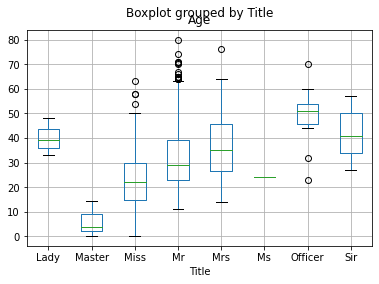

In [43]:
df[df.Age.notnull()].boxplot("Age","Title")

In [44]:
titale_age

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
        ... 
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64

In [45]:
df.Age.fillna(titale_age, inplace=True)

##### Missing Age column problem is complete

In [46]:
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


##### Outliers

In [48]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-999,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,-999,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Lady
1307,-999,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


<AxesSubplot:title={'center':'Passenger Agre histogram to find outliers'}>

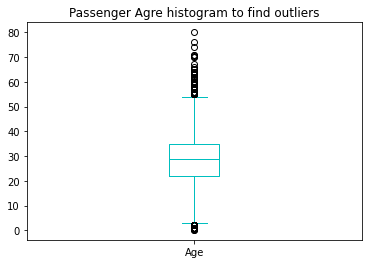

In [53]:
df.Age.plot(kind="box", title="Passenger Agre histogram to find outliers", color="c")

In [55]:
df[df.Fare==df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-999,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


<AxesSubplot:ylabel='Frequency'>

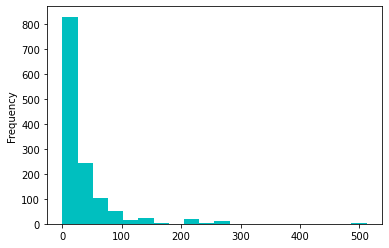

In [57]:
df.Fare.plot(kind="hist", color="c", bins=20)

<AxesSubplot:>

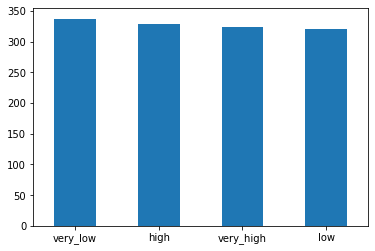

In [65]:
pd.qcut(df.Fare, 4, labels=["very_low","low", "high", "very_high"]).value_counts().plot(kind="bar", rot=0)

In [66]:
fare_bin=pd.qcut(df.Fare, 4, labels=["very_low","low", "high", "very_high"])

In [67]:
fare_bin


PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['very_low' < 'low' < 'high' < 'very_high']

##### Creating a new column (from continuous numeric ciolumn(Fare) to decrete categorical column (Fare_Bin)

In [69]:
df["Fare_Bin"]=fare_bin

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,very_low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,very_high
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,very_high
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,low


### Feature Engineering